In [2]:
#Ces données présente des mesures de la qualité de l'air prélevées à différents moments dans différentes régions ou villes
#d'Andhra Pradesh, avec des informations sur les niveaux de différents polluants atmosphériques.
#stn_code: Code de la station de surveillance de la qualité de l'air.
#sampling_date: Date à laquelle l'échantillon a été prélevé.
#state: État où la station est située.
#location: Emplacement spécifique de la station dans la ville ou la région.
#agency: Agence responsable de la collecte des données.
#type: Type de zone surveillée (résidentielle, industrielle, etc.).
#so2: Concentration de dioxyde de soufre (SO2) en microgrammes par mètre cube.
#no2: Concentration de dioxyde d'azote (NO2) en microgrammes par mètre cube.
#rspm: Concentration de matières particulaires en suspension respirables (RSPM) en microgrammes par mètre cube.
#spm: Concentration de matières particulaires en suspension (SPM) en microgrammes par mètre cube.
#location_monitoring_station: Station de surveillance spécifique.
#pm2_5: Concentration de particules fines (PM2.5) en microgrammes par mètre cube.
#date: Date de l'échantillon.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
# Reading the dataset
df=pd.read_csv('data.csv',encoding='unicode_escape')
# Loading the dataset
df = df.drop(df.index[100000:])
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,253.0,25-12-14,Gujarat,Ankleshwar,Gujarat State Pollution Control Board,"Residential, Rural and other Areas",14.0,21.0,74.0,NaN,"Durga Traders, Bhavanafarm Society , Ankaleshwar",29.0,12/25/2014
99996,253.0,29-12-14,Gujarat,Ankleshwar,Gujarat State Pollution Control Board,"Residential, Rural and other Areas",15.0,21.0,80.0,NaN,"Durga Traders, Bhavanafarm Society , Ankaleshwar",24.0,12/29/2014
99997,252.0,1/6/2014,Gujarat,Ankleshwar,Gujarat State Pollution Control Board,Industrial Area,19.0,16.0,83.0,NaN,Rallis India Ltd. Ankaleshwar,27.0,6/1/2014
99998,252.0,1/9/2014,Gujarat,Ankleshwar,Gujarat State Pollution Control Board,Industrial Area,19.0,16.0,80.0,NaN,Rallis India Ltd. Ankaleshwar,28.0,9/1/2014


In [11]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [13]:
df.shape
# As we can see that there are 100,000 rows and 13 columns in the dataset

(100000, 13)

In [19]:
df.info()
#Cette méthode affiche des informations générales sur le DataFrame, telles que le nombre total de lignes et de colonnes, 
#les noms des colonnes, les types de données de chaque colonne et le nombre de valeurs non nulles.
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     63329 non-null  float64
 1   sampling_date                99999 non-null  object 
 2   state                        99999 non-null  object 
 3   location                     99999 non-null  object 
 4   agency                       61797 non-null  object 
 5   type                         98371 non-null  object 
 6   so2                          92503 non-null  float64
 7   no2                          96951 non-null  float64
 8   rspm                         91233 non-null  float64
 9   spm                          51992 non-null  float64
 10  location_monitoring_station  92626 non-null  object 
 11  pm2_5                        2352 non-null   float64
 12  date                         99999 non-null  object 
dtypes: float64(6), 

In [46]:
df.isnull().sum()
# There are a lot of missing values present in the dataset
#df.isnull().sum() a été utilisée pour compter le nombre de valeurs manquantes dans chaque colonne du DataFrame. 
#Les résultats indiquent le nombre de valeurs nulles pour chaque colonne. 

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [47]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data
#df.describe() fournit des statistiques descriptives pour les valeurs numériques présentes dans le DataFrame.

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [48]:
df.nunique()
# These are all the unique values present in the dataframe
#la colonne state, il y a 37 valeurs uniques, ce qui signifie qu'il y a des données provenant de 37 états différents. 
#De même, pour la colonne type,il y a 10 valeurs uniques, 
#indiquant différents types de mesures ou de sources de pollution.

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

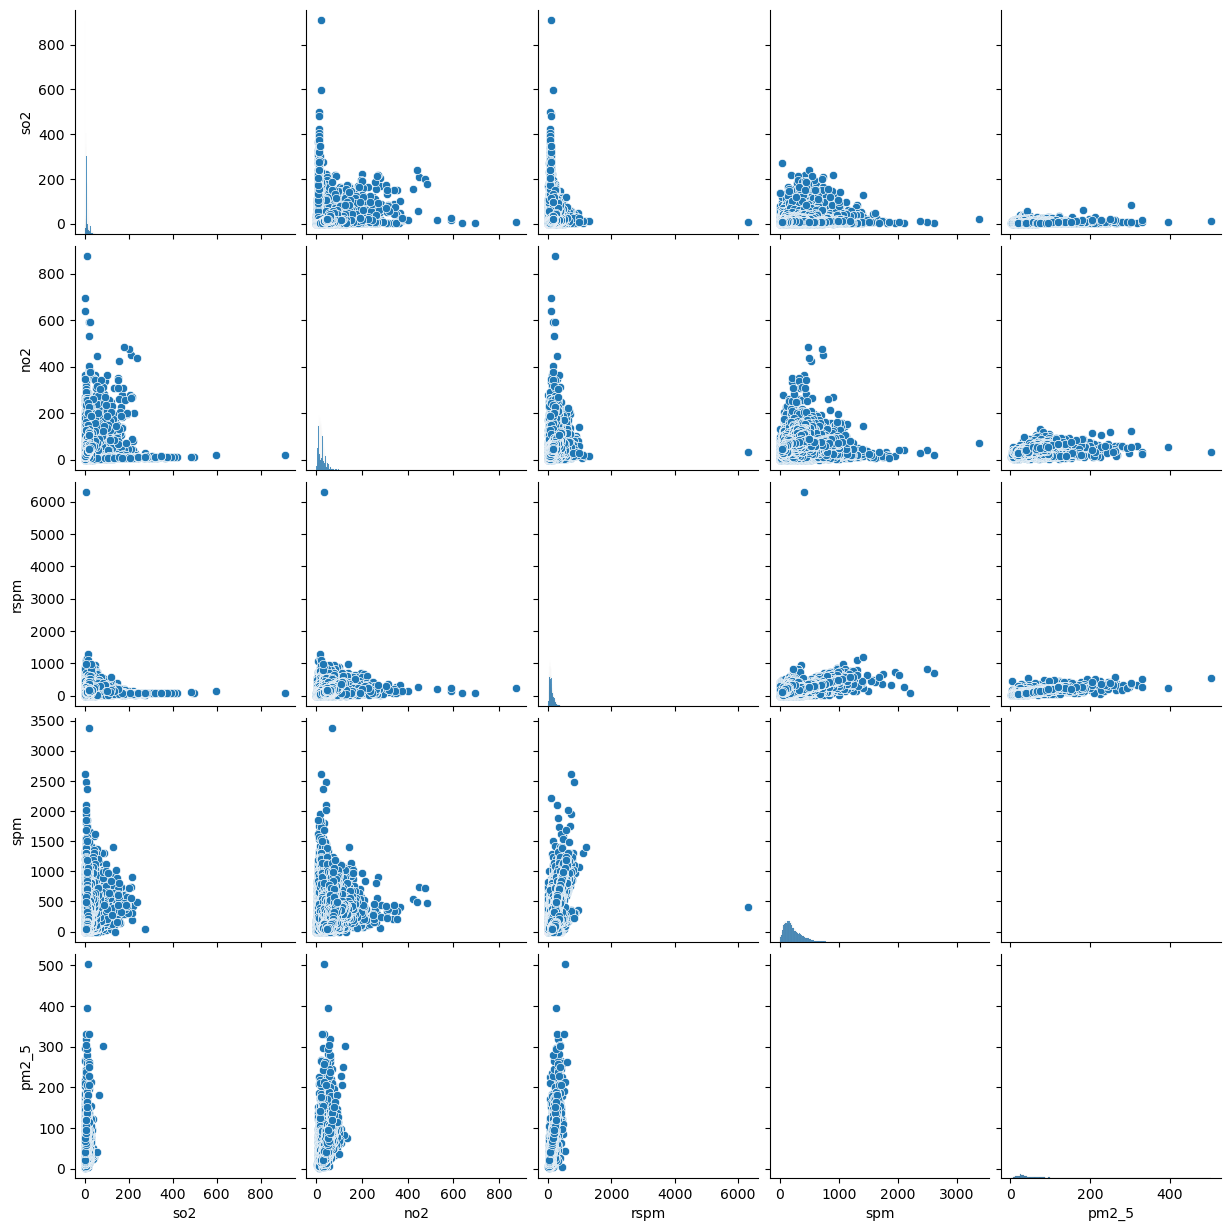

In [58]:
sns.pairplot(data=df)
#cette commande est faite pour détecter les relations linéaires entre les variables, so2,no2,rspm,spm,pm2_5, 
#ainsi que pour identifier les tendances, les clusters et les valeurs aberrantes dans les données. 

In [57]:
df['state'].value_counts()
# Viewing the count of values present in the state column
#compte le nombre d'occurrences de chaque valeur dans la colonne "state" du DataFrame df. 
#Cela permet d'avoir un aperçu de la distribution des États présents dans les données. 
#Voici les États avec le nombre correspondant d'occurrences 

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

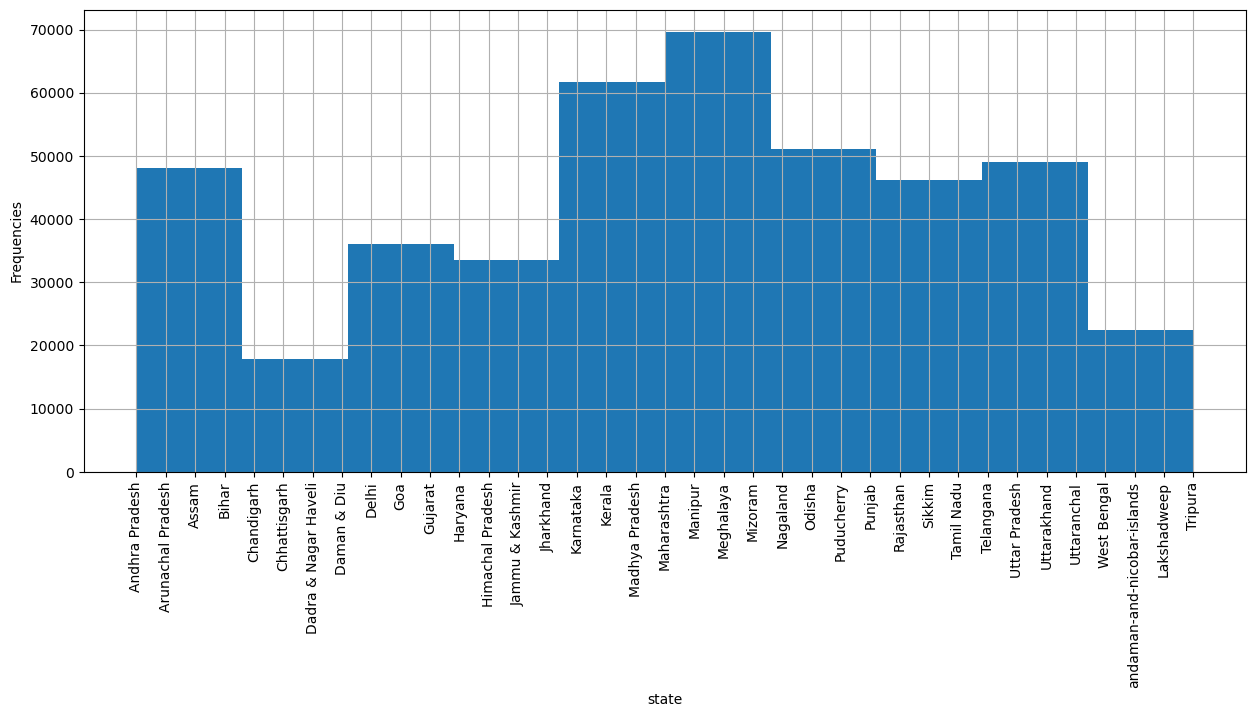

In [59]:
plt.figure(figsize=(15, 6)) #Crée une nouvelle figure de taille 15x6 pouces pour la visualisation.
plt.xticks(rotation=90) #Fait pivoter les étiquettes de l'axe des abscisses de 90 degrés 
#pour éviter le chevauchement des noms des États.
df.state.hist() #Trace l'histogramme des valeurs de la colonne 'state' du DataFrame df, montrant la distribution des États.
plt.xlabel('state') #Définit l'étiquette de l'axe des abscisses comme "state".
plt.ylabel('Frequencies') #Définit l'étiquette de l'axe des ordonnées comme "Frequencies".
plt.plot() #Affiche le tracé.
#crée un histogramme pour visualiser la distribution des states dans le DataFrame df
# The visualization shows us the count of states present in the dataset.

In [60]:
df['type'].value_counts()
# Viewing the count of values present in the type column
#affiche le décompte des valeurs présentes dans la colonne 'type' du DataFrame df, 
#représenter différentes catégories ou types d'aires.

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

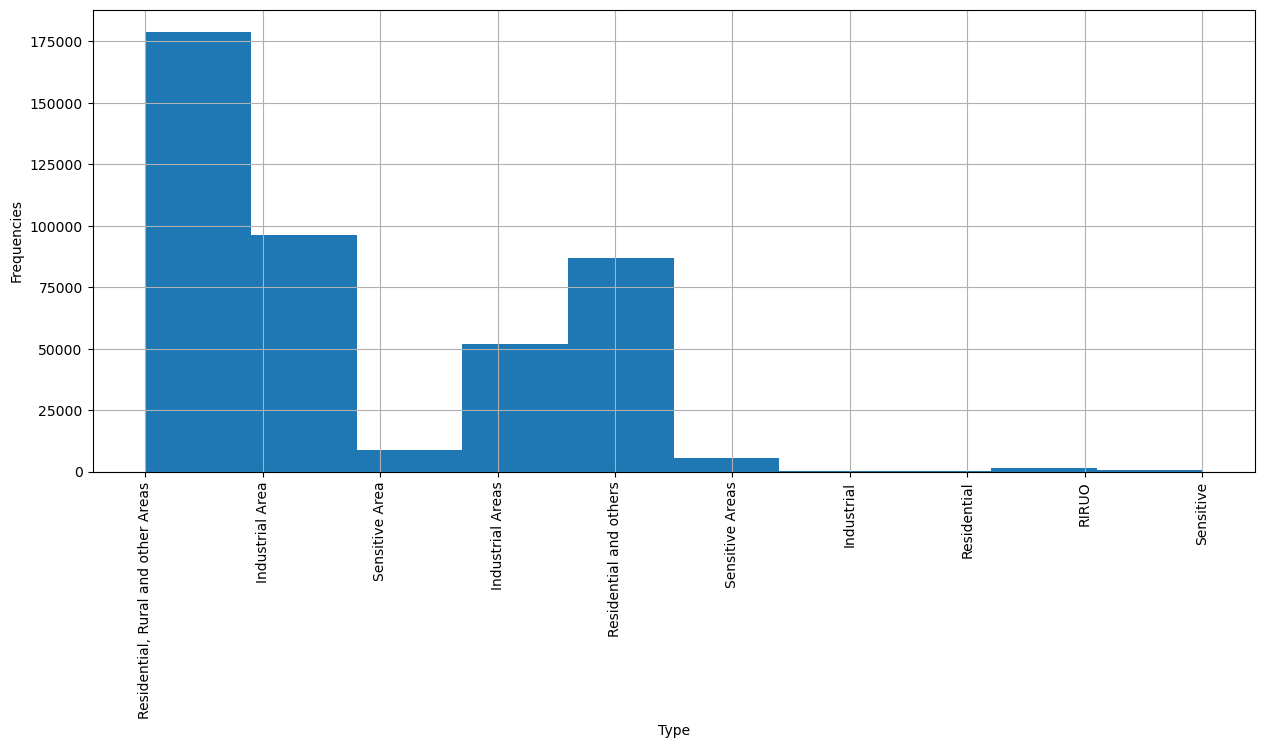

In [61]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
#x représente les différents types d'aires.
#y représente la fréquence ou le nombre d'occurrences de chaque type d'aire.
#Chaque barre sur l'histogramme représente un type d'aire, et sa hauteur représente 
#le nombre d'occurrences de ce type dans le jeu de données.
#un histogramme pour visualiser la répartition des différents types d'aires dans le jeu de données.

In [62]:
df['agency'].value_counts()
#L'axe des x représente les noms des différents organismes ou agences.
#L'axe des y représente le nombre d'occurrences de chaque agence dans le jeu de données.
#Chaque barre sur le graphique représente une agence, et sa hauteur indique le nombre d'occurrences de cette agence
#Certains organismes ou agences apparaissent plus fréquemment que d'autres, 
#ce qui indique leur niveau d'activité ou leur portée géographique.
# la répartition des différents organismes ou agences impliqués dans le contrôle de la pollution environnementale.

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

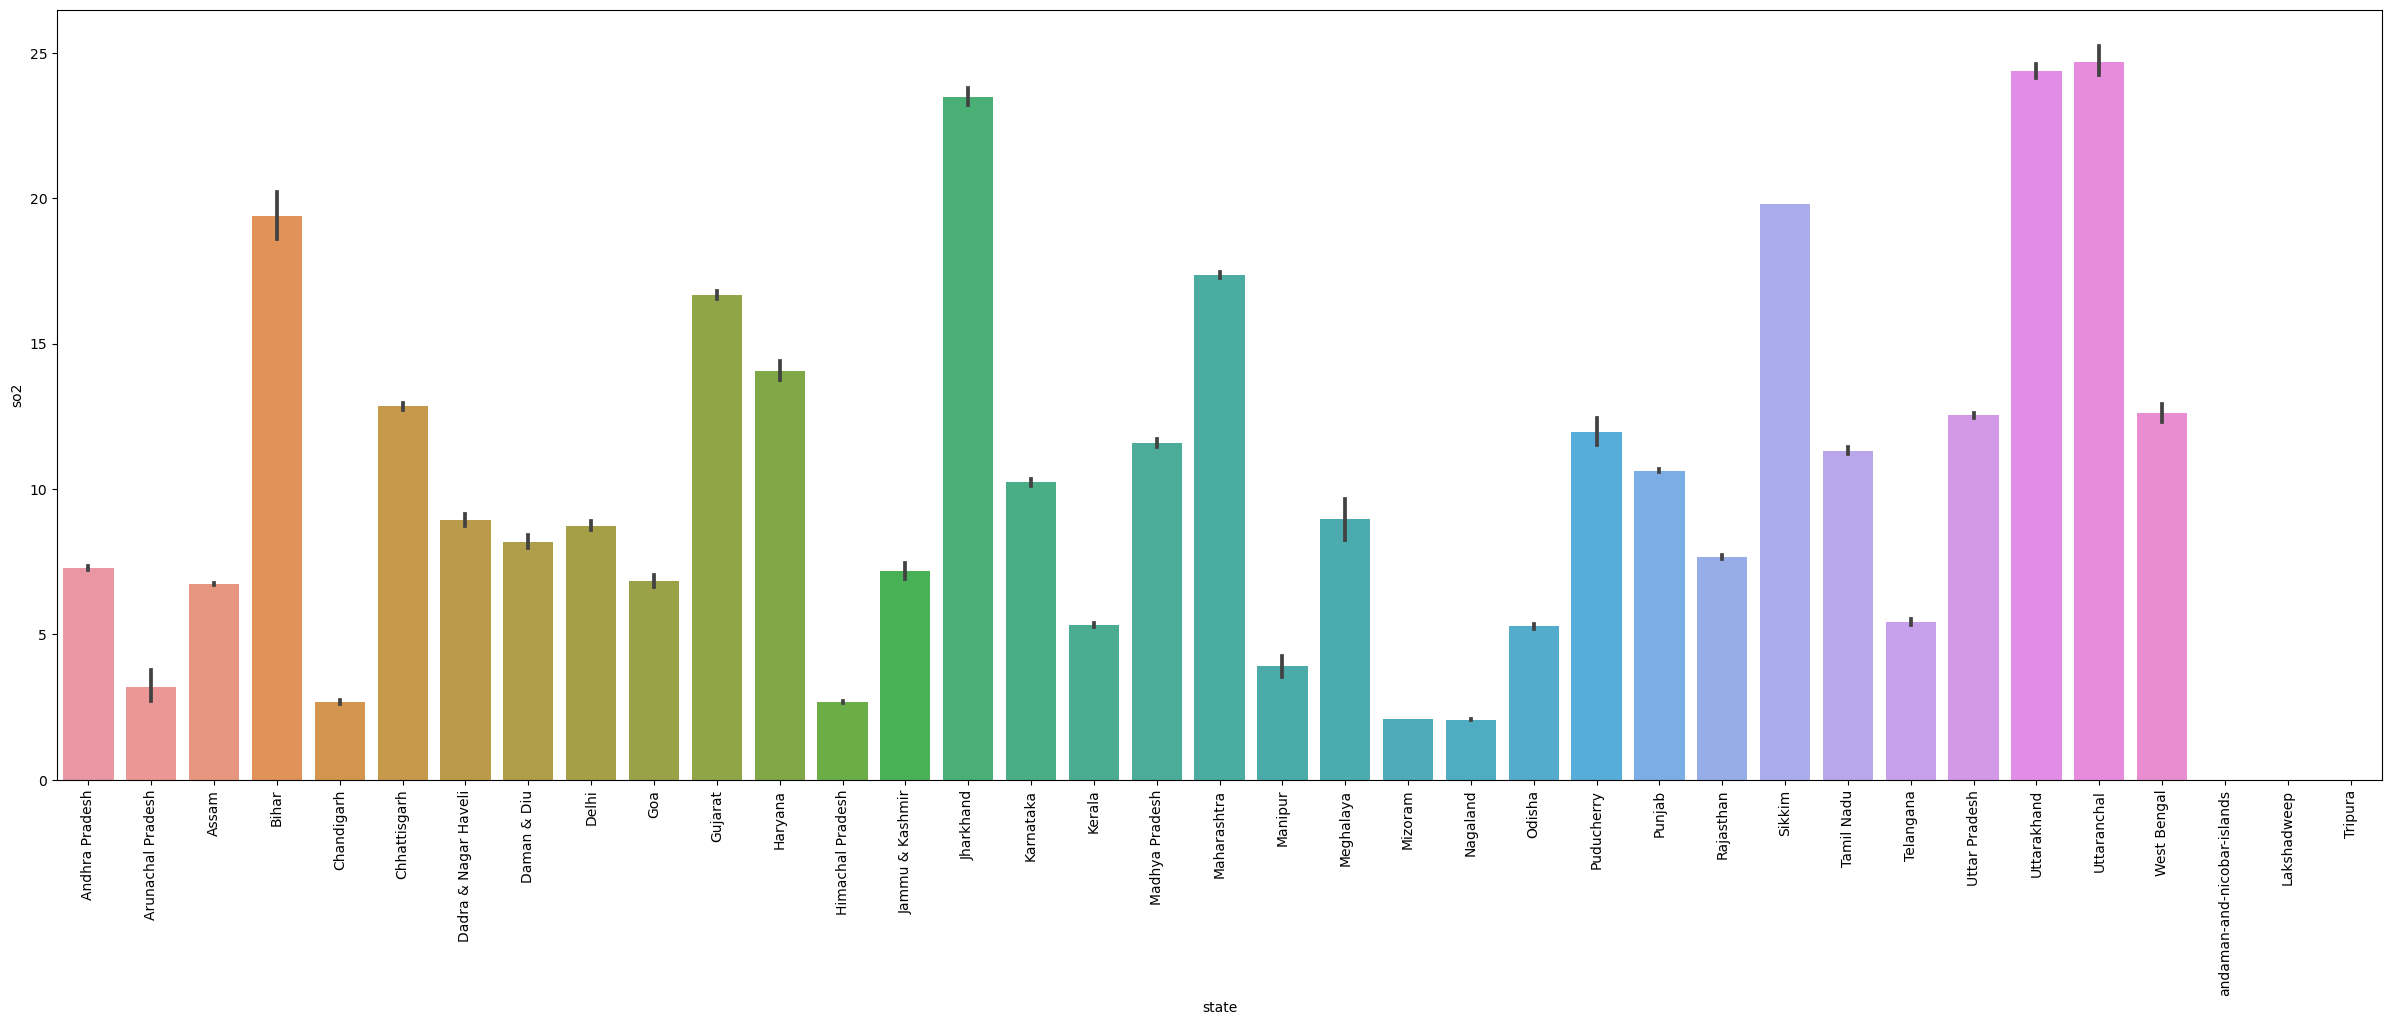

In [63]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
#présenter les niveaux de dioxyde de soufre (SO2) dans l'air pour chaque État. 
#L'axe des x représente les noms des différents États.
#L'axe des y représente les niveaux de dioxyde de soufre (SO2).
#Les États sont classés par ordre décroissant en fonction de leurs niveaux moyens de SO2.
#L'État ayant les niveaux les plus élevés de SO2 est présenté en haut du graphique, 
#tandis que celui ayant les niveaux les plus bas est en bas.
#Dans ce cas, l'État ayant les niveaux les plus élevés de SO2 est "Uttaranchal", suivi de "Uttarakhand".

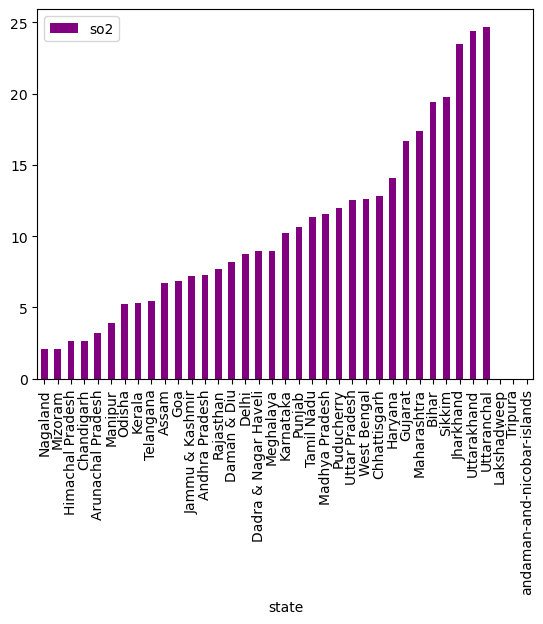

In [64]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
#présenter les niveaux moyens de dioxyde de soufre (SO2) dans l'air pour chaque État, classés par ordre croissant.
#j'ai utiliser la fonction groupby pour trier les valeurs dans un ordre croissant 
#en fonction de l'axe des x, de l'axe des y et de ses clés

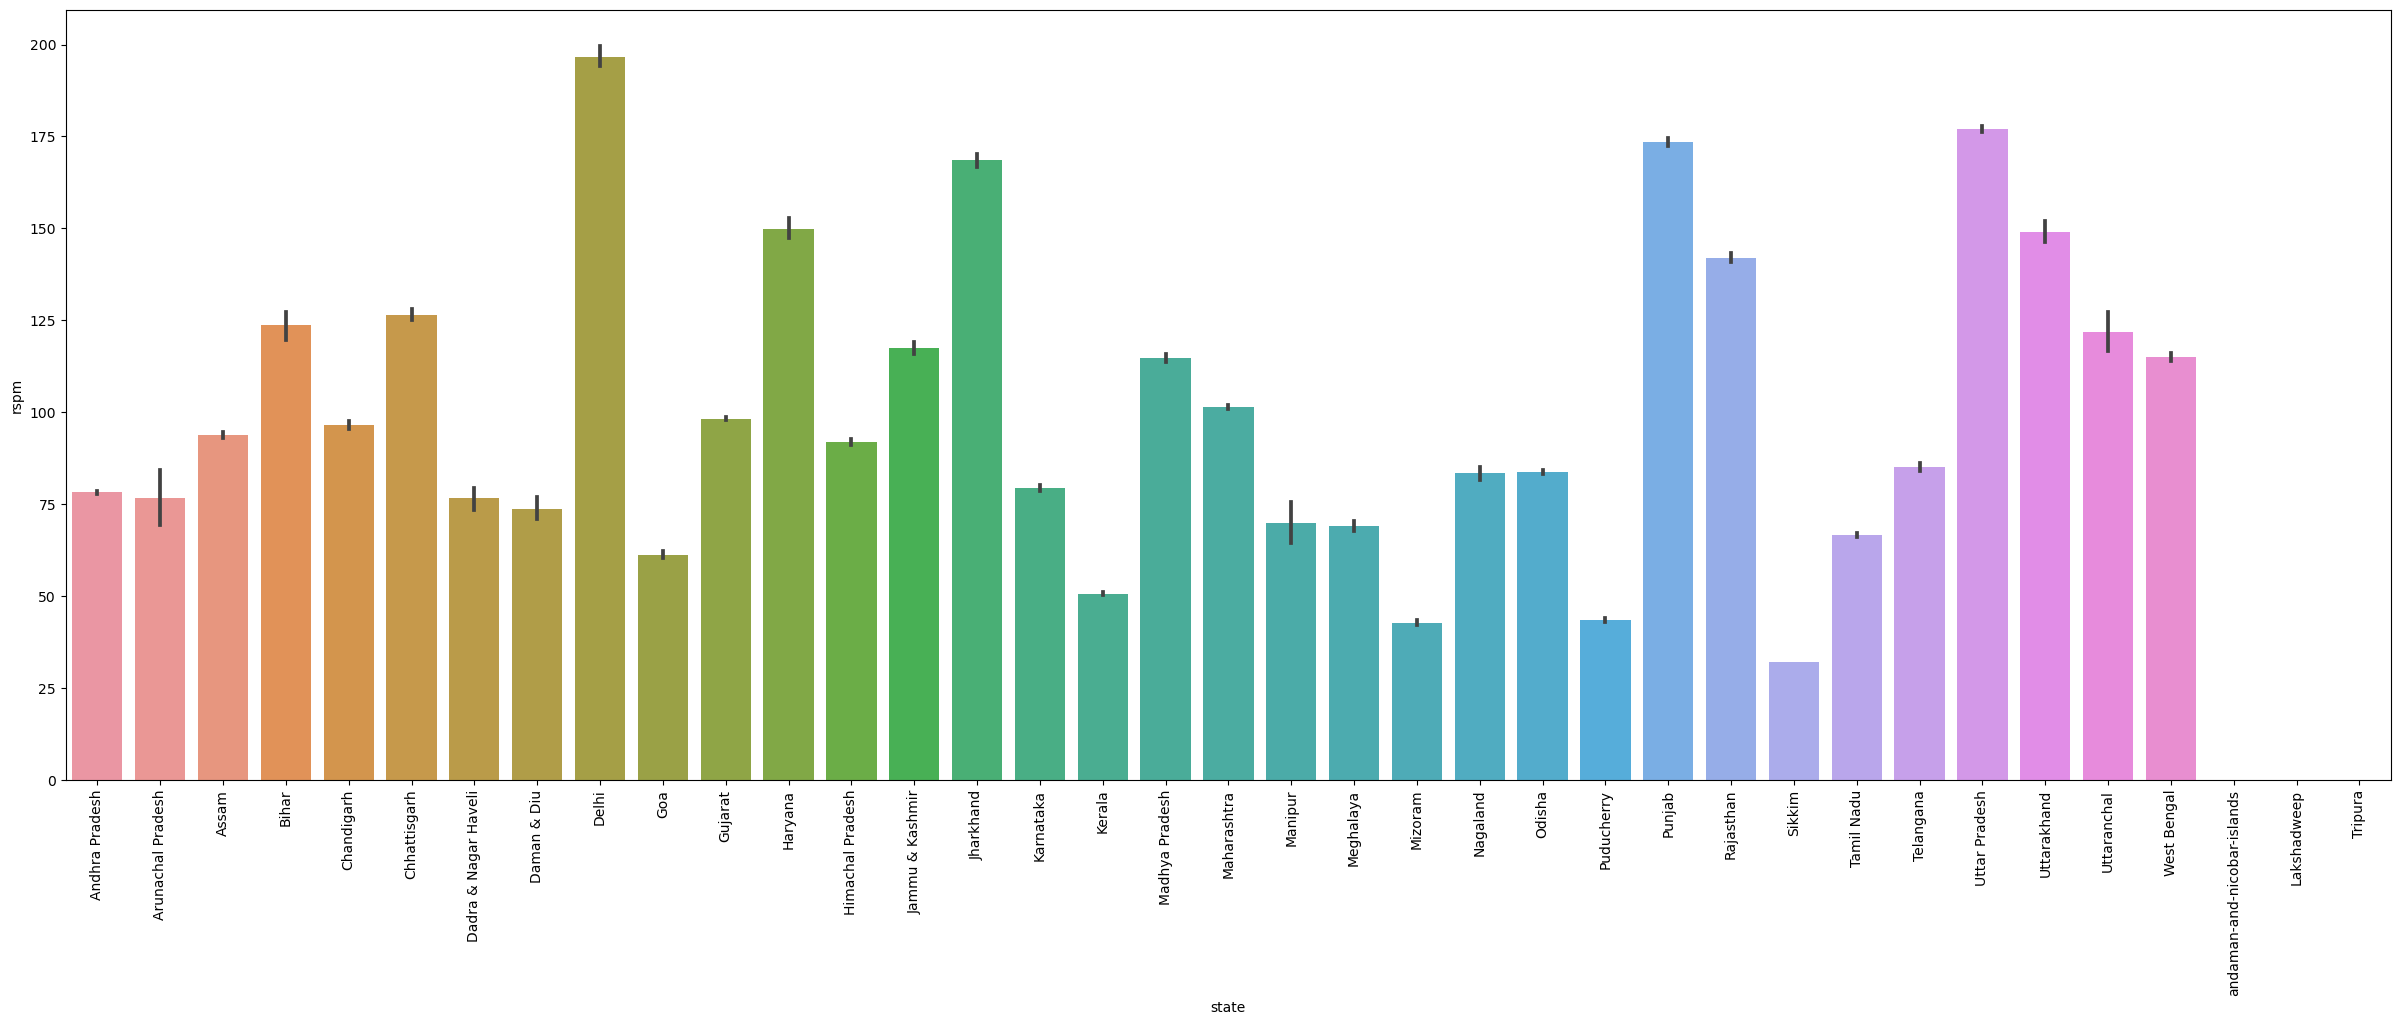

In [65]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi a un niveau de rspm plus élevé par rapport aux autres États.

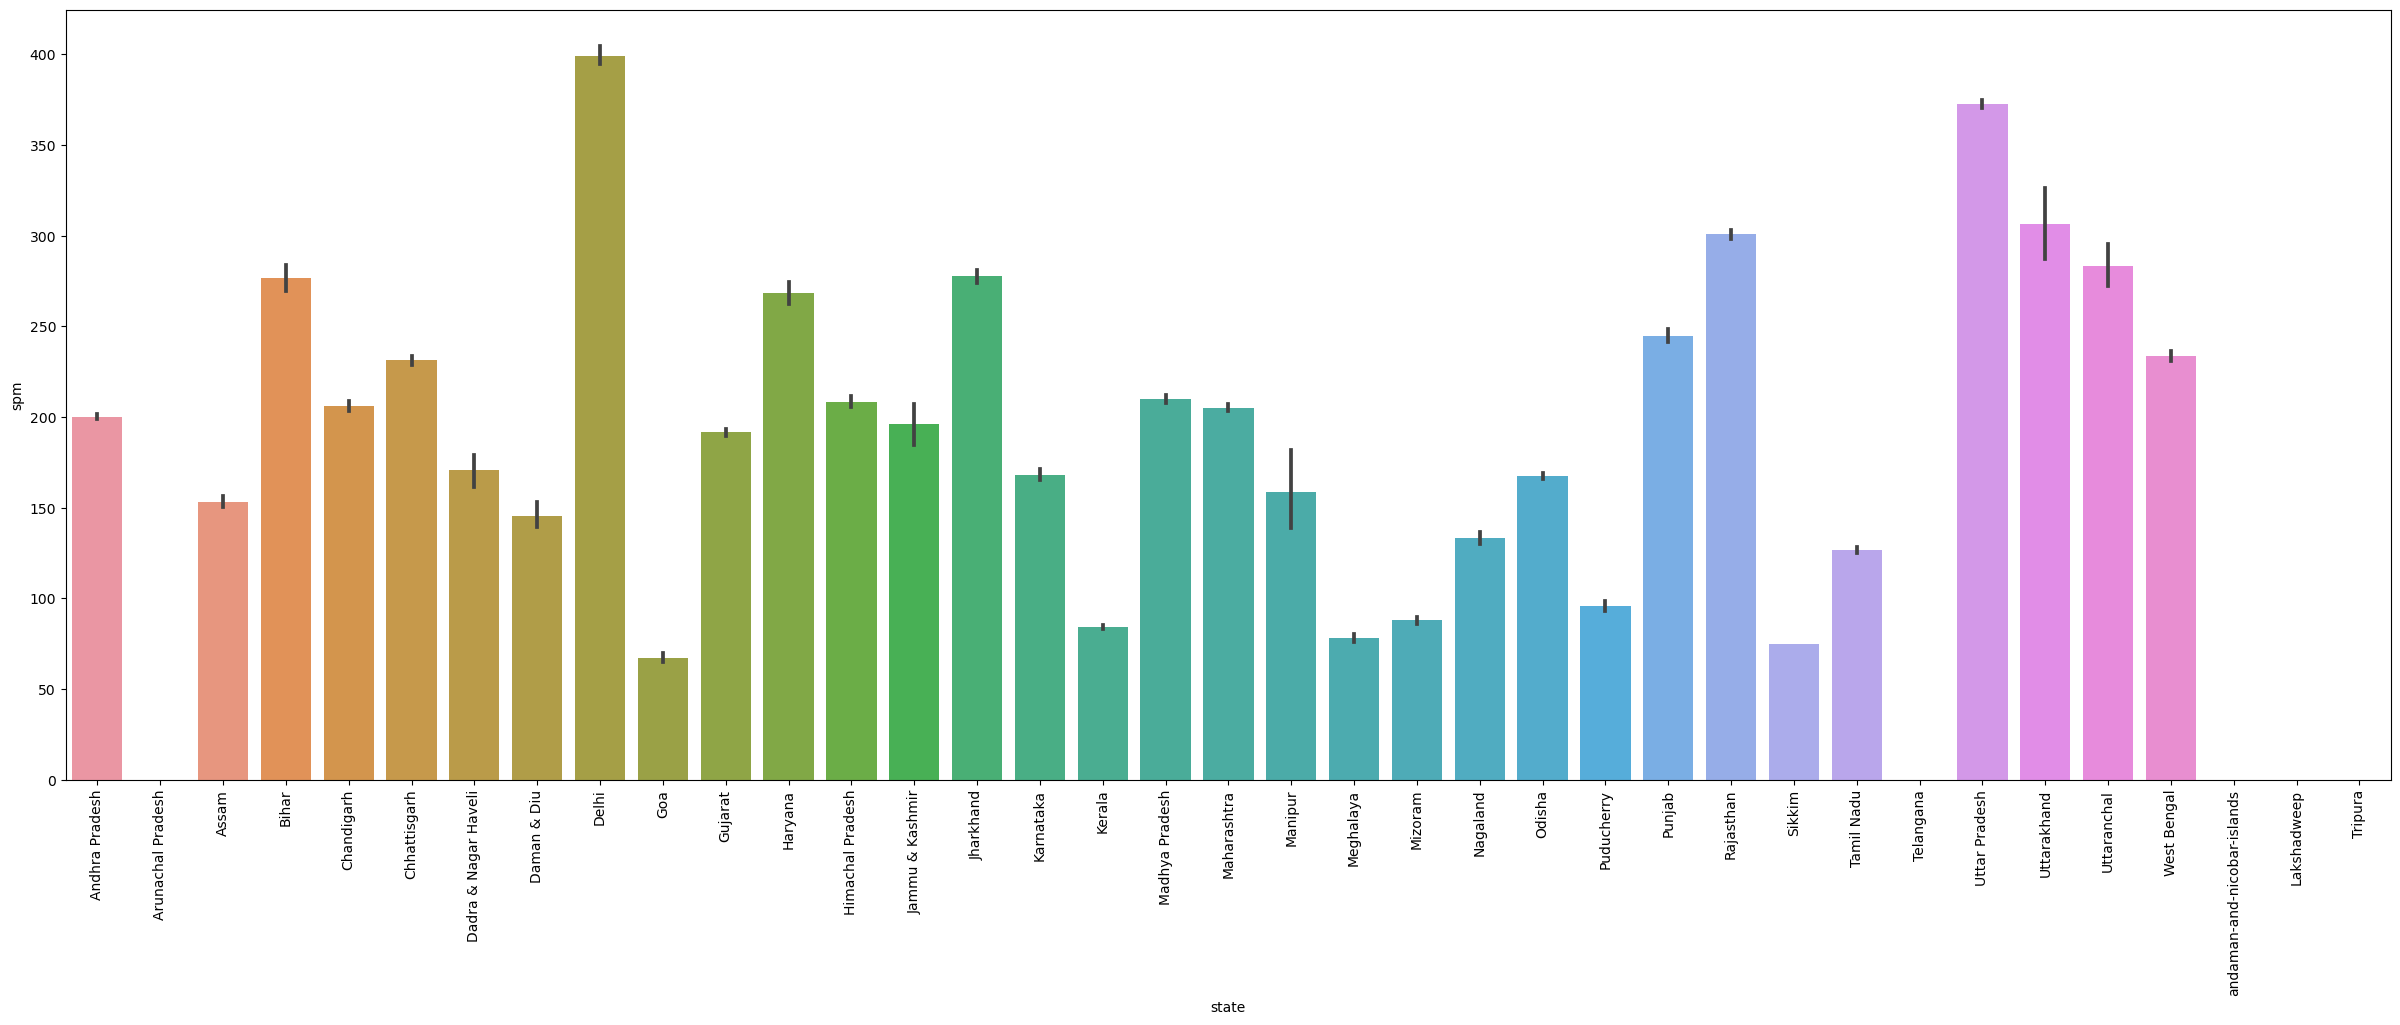

In [66]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi a un niveau de spm plus élevé par rapport aux autres États.

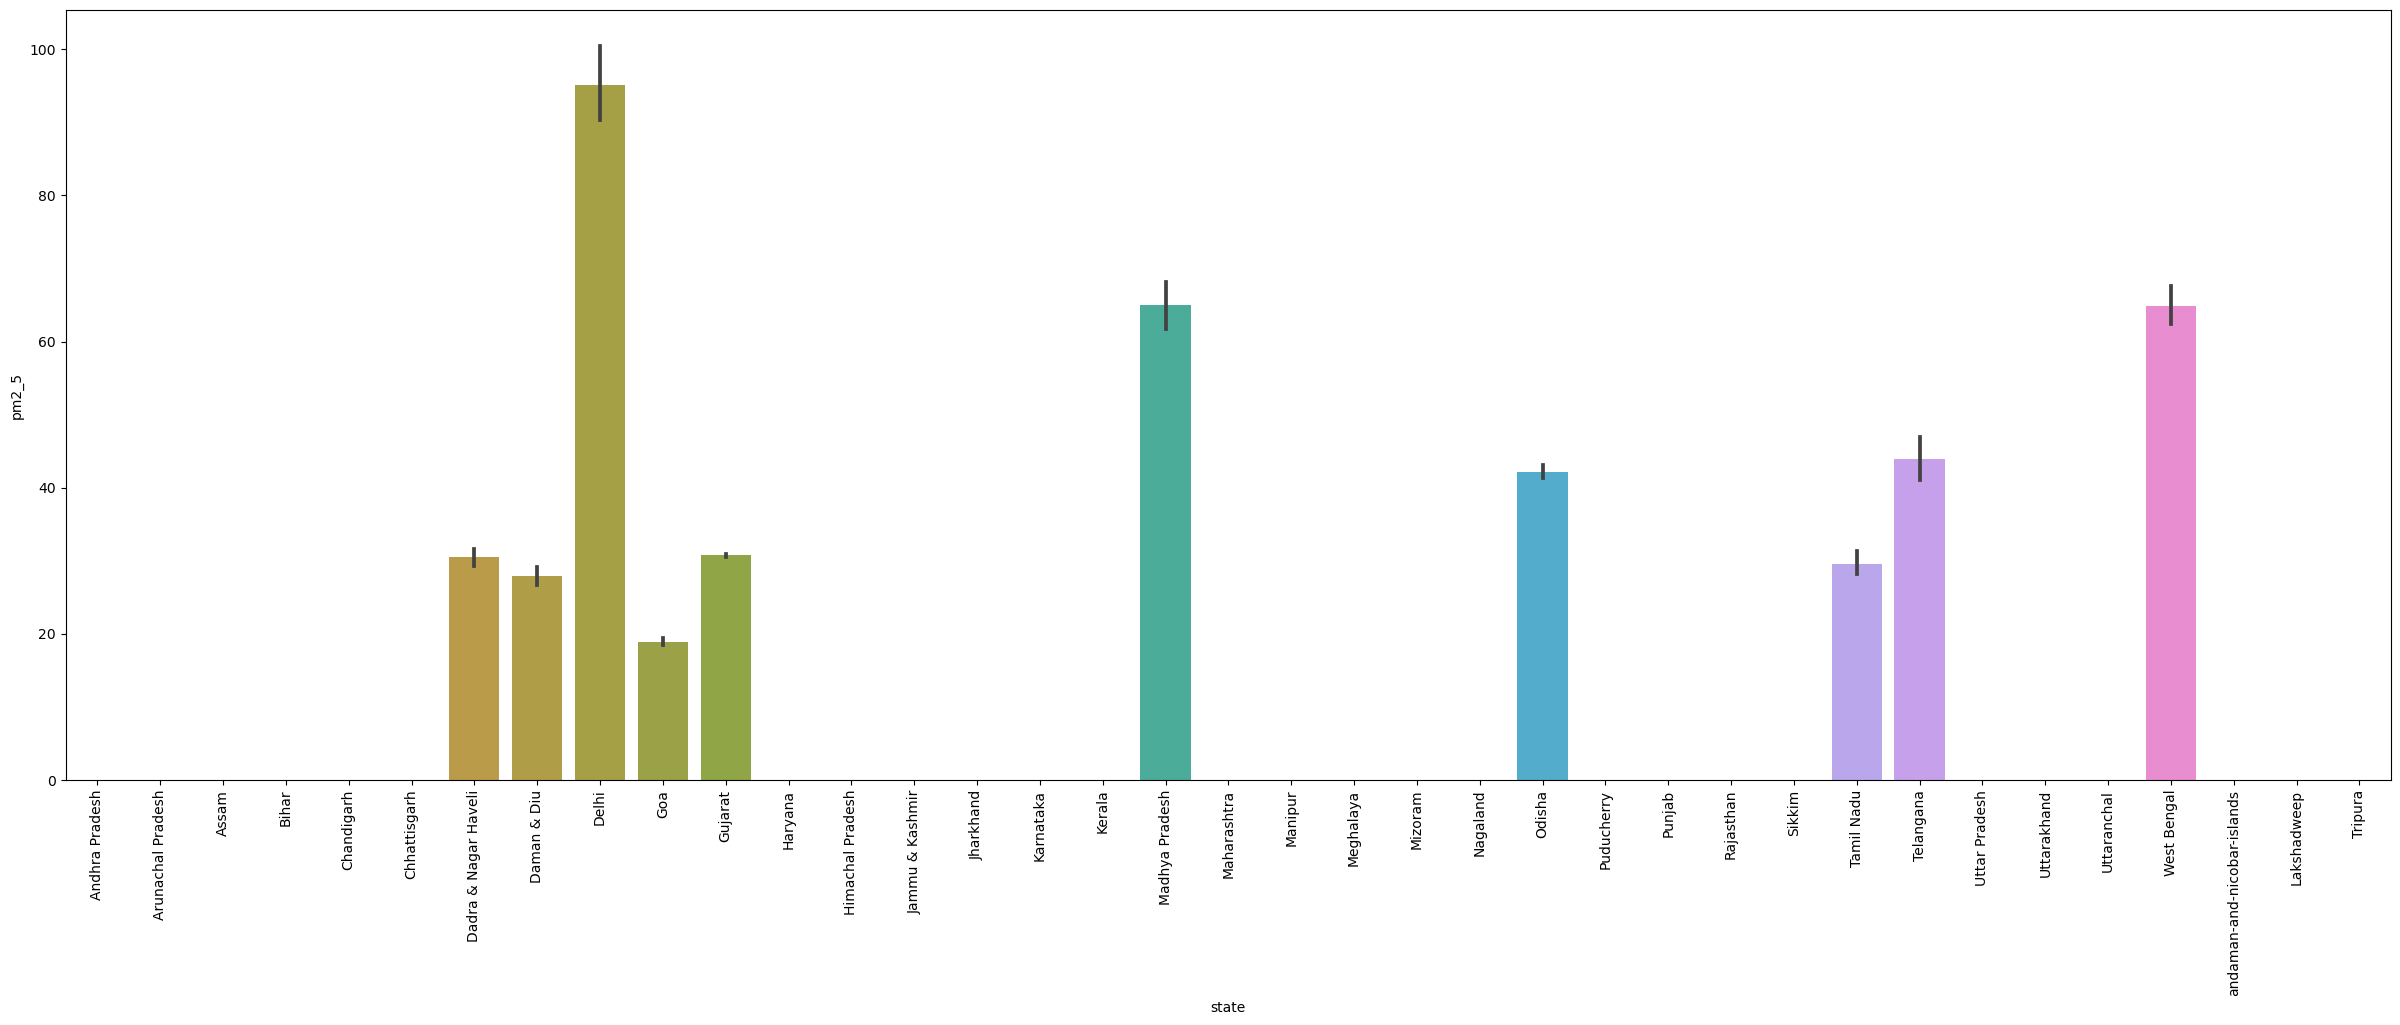

In [67]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi a un niveau de pm2_5 plus élevé par rapport aux autres États.


In [68]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Vérification de toutes les valeurs nulles

In [69]:
nullvalues
# Des valeurs nulles plus élevées sont présentes dans pm2_5, suivies de spm.

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [70]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [1]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Suppression des colonnes inutiles

NameError: name 'df' is not defined

In [72]:
df.isnull().sum()
#  vérification des valeurs nulles.

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [73]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.fillna(0, inplace=True)
#Les valeurs nulles sont remplacées par des zéros pour les données numériques.

In [75]:
df.isnull().sum()
# nous avons réussi à imputer avec succès les valeurs nulles qui étaient présentes dans le jeu de données.

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [2]:
df

NameError: name 'df' is not defined

In [6]:
df = df.iloc[:100000]